In [1]:
%load_ext watermark
%watermark -v -m -p numpy,scipy,pandas,matplotlib,sklearn

CPython 3.5.2
IPython 6.2.1

numpy 1.14.2
scipy 1.0.1
pandas 0.22.0
matplotlib 2.2.2
sklearn 0.19.1

compiler   : GCC 5.4.0 20160609
system     : Linux
release    : 4.9.87-linuxkit-aufs
machine    : x86_64
processor  : x86_64
CPU cores  : 2
interpreter: 64bit


In [2]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:           1980         801          70           1        1108         992
Swap:          1023           1        1022


In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from ipywidgets import Image
from io import StringIO
import pydotplus 
from sklearn.tree import export_graphviz

In [4]:
import time
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(100)):
    time.sleep(0.05)

HBox(children=(IntProgress(value=0), HTML(value='')))

In [5]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
pd.DataFrame(X, columns=cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
import xgboost, lightgbm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
xgb = xgboost.XGBClassifier(n_estimators=200)
xgb.fit(X_train, y_train)
prediction = xgb.predict_proba(X_test)

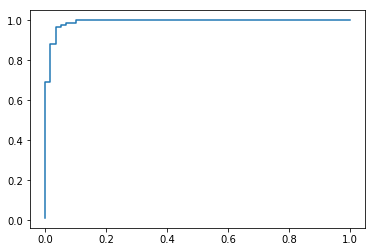

In [8]:
fpr, tpr, _ = roc_curve(y_test, prediction[:,1])
plt.plot(fpr, tpr);

In [9]:
import fbprophet

In [10]:
!vw --version

8.5.0


In [11]:
import keras

Using TensorFlow backend.


In [12]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [13]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, y_train)

In [14]:
dot_data = StringIO()
export_graphviz(tree, feature_names=cancer.feature_names, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\xa7\x00\x00\x01\xf1\x08\x06\x00\x00\x00y\xe1\x00\xf0\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddwx\x8e\xd7\x1f\xc7\xf1O&\x12Ab\xcf\xa2f\xa5f\x88Q{\x97\xdabT)\xb5\x8a\xd6\xa8\xa2\xa8U[\x95*m\xa9\xf5C\x11Q\xab\xb6\x94\x18\xa1!A\xed\xd5\xdaA\xc8\x16\x12\x92<\xbf?4i"\tI$y"\xde\xaf\xebr]O\xce9\xf79\xdfs\xc7\xed\x8a\xaf\xe3{\x9b\x18\x0c\x06\x83\x00\x00\x00\x00\x00\x00\x00\x00H;.\xa6\xc6\x8e\x00\x00\x00\x00\x00\x00\x00\x00\xf0\xe6!9\r\x00\x00\x00\x00\x00\x00\x00Hs$\xa7\x01\x00\x00\x00\x00\x00\x00\x00i\xce\xdc\xd8\x01\x00\x00\x00\xa4\xa6k\xd7\xae\xe9\xd8\xb1c\xc6\x0e\x03\xc0\x1b\xc6\xcc\xccL\xef\xbf\xff\xbe2g\xcel\xecP\x00\x00\x00\xd2-\x13^\x88\x08\x00\x002\xb2.]\xbah\xed\xda\xb5\xc6\x0e\x03\xc0\x1b\xe8\xb7\xdf~S\xbbv\xed\x8c\x1d\x06\x00\x00@z\xe5\xc2\xc9i\x00\x00\x90\xa1EDD\xa8z\xd3\xb6\x1a2{\x85\xb1C\x01\xf0\x06\xe9lo\xa3\xf0\xf0pc\x87\x01\x00\x00\x90\xaeQs\x1a\x00\x00\x00\x00\x00\x00\x00\x90\xe6HN\x03\x00\x00\x00\x00\x00\x00\x00\xd2\x1c\xc9i\x00\x00\x00\x00\x00\x00\x00@\x9a#9\r\x00\x00\x00\x00\x00\x00\x00Hs$\xa7\x01\x00\x00\x00\x00\x00\x00\x00i\xce\xdc\xd8\x01\x00\x00\x00\x00x\xbd\x18"#u`\xcb\x1a9\xcf\x9b$?\x1fo\xad=\x13\xfc\xc2\xf1\xa7\x8f\xec\xd5\xc6E\xdf\xea\xea\xb9\x13\x92\xa4\xe2\xe5*\xabM\x9f\xe1z\xb7F\xfd8c;\xdb\xdb$8\xcf\xcb\xd6\x89)\xec\xf1#\xfd\xbe\xec{\xfd\xb9{\xa3\xee\xdd\xbc*sss\xbdU\xa6\xbc\x9aw\x1b \xc7\xc6\xadSm]\x00\x00\x00$\x1e\'\xa7\x01\x00\x00`t\x13\xba7\xd1\x84\xeeM\x8c\x1d\x06\x12\xe1\xd4\xe1?4\xb2C-\xed\xdb\xb8B~>\xde/\x1d\xbf\x7f\xf3\xaf\x9a\xd2\xa7\xb5\x8a\x94*\xa7y;\xcfh\xde\xce3*\\\xf2\x1dM\xed\xdbZ\x07\xb7\xaeM\x95\x18\x1f=\x0c\xd2\xb8n\x8d\xf4\xfb\xb2\xb9j\xd6\xb5\xbf\xe6\xef>\xab9\xdbN\xaaF\xd3v\x9a?\xaa\xb76/\xfe.U\xd6\x05\x00\x00@\xd2pr\x1a\x00\x00 \x03\x89:\xfd\xf9\xba\x9d\xf4\x8c\x8c\x8c4v\x08\xd1^\xd7{\x98V\x96O\xfdR]\x86NR\xd5\x86-_x\xdaX\x92\x02\xee\xdf\xd5\xd2\xc9\xc3T\xaaB5\xf5\x185S&&&\x92\xa4\x1e\xa3f\xea\xef3^Z\xfa\xcdP\x95\xaf\xd1@\xd9s\xe6\x89u\xdd\xab\xde{\x97\xf9St\xfd\xe2iu\x1b>Y\x8d\x9czE\xb77\xed\xdaO!A\x01r\x9e7IU\xea5W\xa1\x12eSt]\x00\x00\x00$\r\'\xa7\x01\x00\x00`t\x93V\xb9j\xd2*Wc\x87\xf1\xdayp\xe7\xa6\xb6,\x99\xa3\x11m\xab\xa7\xd9\x9a\xb36\x1fU\xd5\x86-\x135v\xef\x86\x15\n{\xfcH\xf5\xdau\x8fNLK\x92\x89\x89\x89\xea\xb5\xed\xae\xc7!\x0f\xb5o\xc3\xca\x14\x8f\xd1c\xcffI\x92c\xe3\xb6q\xfaj\xbe\xdfQ\x91\x91\x11\xfac\xfd\xf2\x14_\x17\x00\x00\x00I\xc3\xc9i\x00\x00\x00\xe05\xf20\xd0_\x7f\xee\xda\xa8C\xdb\x9cu\xf1\xf8\x11\x99\x98\x98\xaa\x9cc\xdd4[\xdf\xcc,\xf1\x7f\x858sd\x9f$\xa9Dy\x878}%\xffm;u\xf8\x0f\xb5\xe9\xf3E\xca\x04\xf7\xaf\xc0\x07\xf7$I9r\xe5\x89\xd3\x973o\x01I\xd2y/\xf7\x14]\x13\x00\x00\x00IGr\x1a\x00\x00 \x86\xe7\xcb\x14\x8cX\xe0\xa2\xcau\x9bI\x92v\xafY\xa4\xa5S\xbe\xd0\xb7\x9b\x8f\xa9\xd0\xdbe$I\x07\xb7\xae\xd5\x82Q}\xa2\xc7G\x95\x05\x08xpO.\x0b\xa6\xe8\xc4\xfe]\n\xf4\xbb\xaf\xecv\xb9U\xb9^3u\x1c8&V\t\x83\x98\xeb}\xbf\xe3\x94V};F\xe7\x8e\x1ePHp`\xf4|\x8f\x1e\x06i\xfd\x82\xa9\xf2\xdc\xbbU\xfe\xf7\xef*S\x16+\x15(ZR\xa5*UW\xf5\xa6\xedT\xe2\xdd*q\xe6\x8a\xfa\\\xbf]w\xf5\x9b\xb4 \xd1{\xfev\xf31\xad\x9c\xf9\x95.\x9d\xfcS\x91\x91\x91z\xa7jmu\x1b>E\x05\x8b\x97\x8euM\x90\xdf}\xb9\xcc\x9f"/\xb7\x1d\n\xf4\xbb\xaflv\xb9T\xb9NSu\x1c4V9r\xe5M\xd2\xfeb\x8e\x89YV!f\xfbO{/i\xd9\xd4\xe1:u\xf8\x0f\x99[X\xaar\xdd\xe6\xfax\xf4,\x85\x04\x06h\xf9\xb4\xe1:w\xec\xa0,3[\xa9\xe2{\x8d\xd5}\xd4\x0cY\xdbd\x7f\xe5x\x13\xba\x87)\xb9\xf7\xc4z\x12\xf6X^\xfb\xb6\xeb\xd0Vg\x9d<\xe4\xaa\x88\xf0\xa7*\xfeN%}4b\x9aj6\xef\x10k\xdd\xf8\xd6O\x8c\xd4(iq\xeb\x9f\x8b\x92\xa4\x9c\xf9\n\xc5\xe9\xcb\x99\xbf\xb0$\xc9\xfb\xea\xa5\xb8\xb1|?Q\xee\xdb\xd7\xc9\xdf\xe7\xae\xb2\xd9\xe5V\xa5:M\xd4q\xc0h\xe5\xc8\x9d/Q\xeb\xda\xd8\xe5R\xc0\xfd\xbb\nx\xe0\xa3\xdc\x05\x8b\xc4\xea\x0b\xf4\xf5\x91$\xf9\xdc\xbc\x9a\xe2\xeb\x02\x00\x00 iHN\x03\x00\x00\xc4\xb0\xf6L\xb0\xbe\xfd\xbc\xb3<\xf7nS\xf7\x91\xd3\xa3\x13\xd3\x92\xb4\x7f\xf3jI\xd2\xc1\xdf\xd7\xa8\xcb\x90\x89\x92\xa4\xda-;K\x92\x0eo_\xaf\x91?\xae\x97\xf4,1=\xa6s=EFFh\xd0\xb4_T\xdc\

![](https://habrastorage.org/webt/dh/_y/z4/dh_yz4ufh_uqgv3i1c-z4h4dm6u.jpeg)

In [15]:
import torch
from torch import FloatTensor
from torch.autograd import Variable


$X = \begin{bmatrix} 1 & 1 \\ 1 & 1\end{bmatrix}$, $Z = 2 * (X + 2) ^ 2$, $out = \bar{Z}$

In [16]:
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [17]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [18]:
z = y * y * 2
z

Variable containing:
 18  18
 18  18
[torch.FloatTensor of size 2x2]

In [19]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [20]:
out.backward()

In [21]:
x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]